# Semana Três - AceleraDev
Notebook das aulas da terceira semana do curso AceleraDev Data Science.

## Importação das Bibliotecas e dos Dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./houses_to_rent_v2.csv')

In [9]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [11]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

## Estatistica descritiva Univariada

In [3]:
data.rename(columns={'rent amount (R$)':'valor_aluguel'}, inplace=True)

In [13]:
print("Média: ",data['valor_aluguel'].mean())
print("Mediana: ",data['valor_aluguel'].median())
print("Desvio Padrão: ",data['valor_aluguel'].std())

Média:  3896.247194163861
Mediana:  2661.0
Desvio Padrão:  3408.5455176710816


In [14]:
data['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

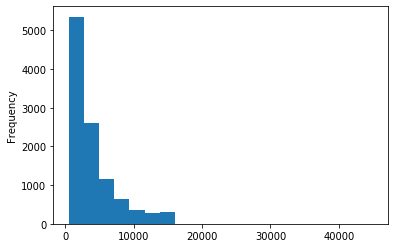

In [15]:
data['valor_aluguel'].plot(kind='hist', bins=20)

In [16]:
print("Assimetria: ", data.valor_aluguel.skew())
print("Achatamento: ", data.valor_aluguel.kurtosis())

Assimetria:  1.8388773035440982
Achatamento:  4.624228179818687


## Estatistica Multivariada

### Perguntas
- Cidade com média de aluguel mais alta?
- Quantos Banheiros existem nas residências com aluguéis mais altos?
- Os imóveis mais caros aceitam animal?
- Os imóvies mais caros são mobiliados?

In [27]:
#Cidade com média de aluguel mais alta
data.groupby('city').agg('mean')['valor_aluguel']\
                    .reset_index()\
                    .sort_values('valor_aluguel', ascending=False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [26]:
#Quantos Banheiros existem nas residências com aluguéis mais altos?
threshold = data.valor_aluguel.describe().loc['75%'] #considerado como limite de alguel alto

data['aluguel_alto'] = ['Alto' if x>threshold else 'Baixo' for x in data['valor_aluguel']]

In [56]:
data.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [68]:
#Os imóveis mais caros aceitam animal?
#data.groupby(['aluguel_alto','animal']).count()
data.groupby(['aluguel_alto','animal']).size()

aluguel_alto  animal   
Alto          acept        2084
              not acept     455
Baixo         acept        6232
              not acept    1921
dtype: int64

In [71]:
#Os imóvies mais caros são mobiliados?
data.groupby(['aluguel_alto','furniture']).size()

aluguel_alto  furniture    
Alto          furnished         878
              not furnished    1661
Baixo         furnished        1728
              not furnished    6425
dtype: int64

### Hipóteses
- São Paulo é a Cidade com o aluguel mais alto.
- Quantos mais banheiros tem um imóvel, maior o valor do aluguel.
- Os imóveis com mobilia tem o aluguel mais alto.

## Visualização de Dados

In [5]:
import seaborn as sns

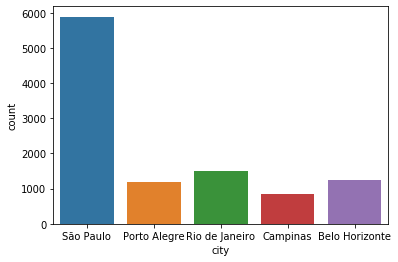

In [6]:
sns.countplot(x='city', data=data)

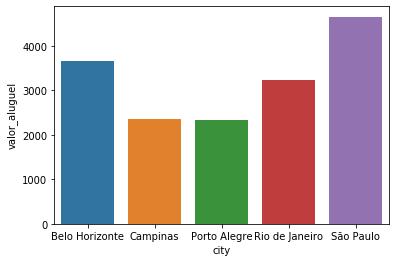

In [9]:
sns.barplot(x='city', y='valor_aluguel', \
            data=data.groupby('city')['valor_aluguel'].mean().reset_index())

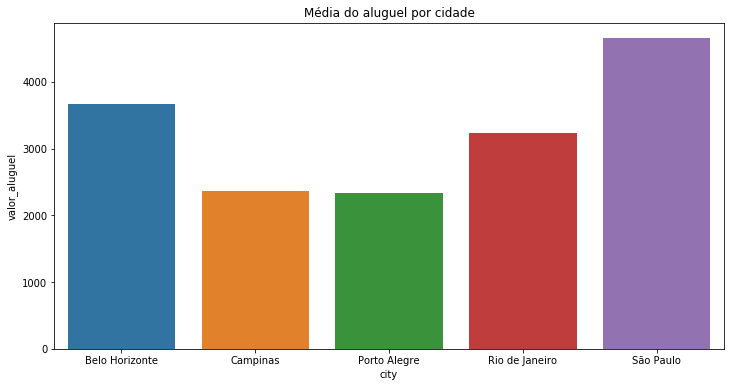

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x='city', y='valor_aluguel', \
            data=data.groupby('city')['valor_aluguel'].mean().reset_index())
plt.title('Média do aluguel por cidade')
plt.show()

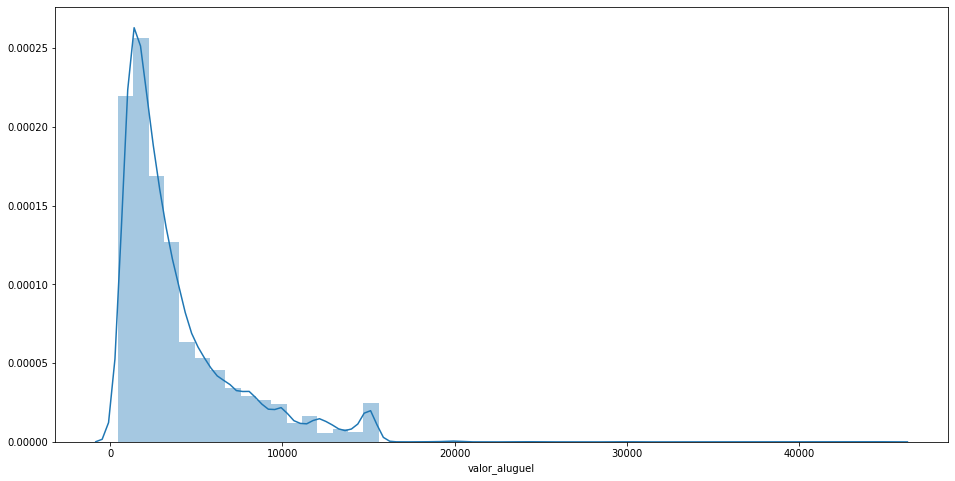

In [15]:
plt.figure(figsize=(16,8))
sns.distplot(data['valor_aluguel'])
plt.show()

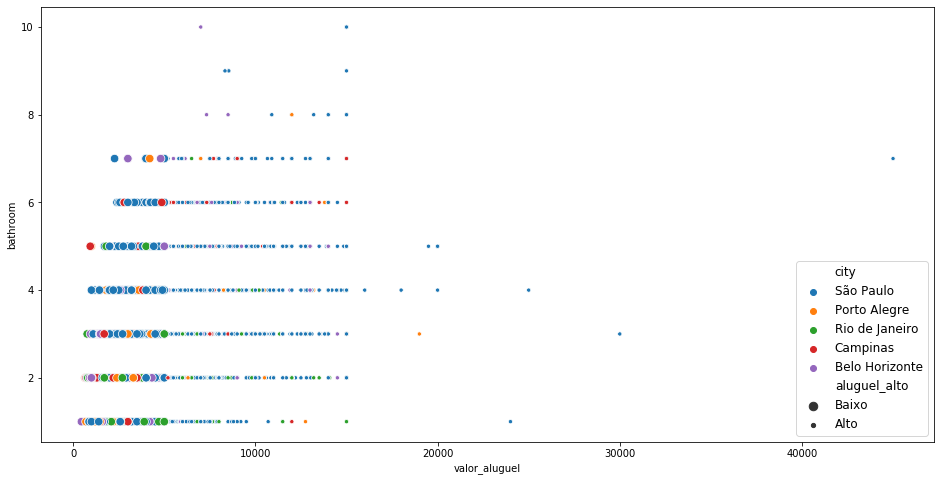

In [27]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='valor_aluguel', y ='bathroom', data=data, hue='city', size= 'aluguel_alto')
plt.legend(fontsize=12)

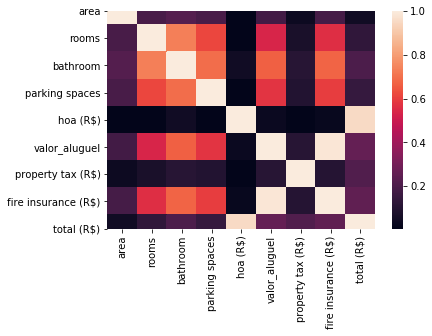

In [28]:
sns.heatmap(data.corr())

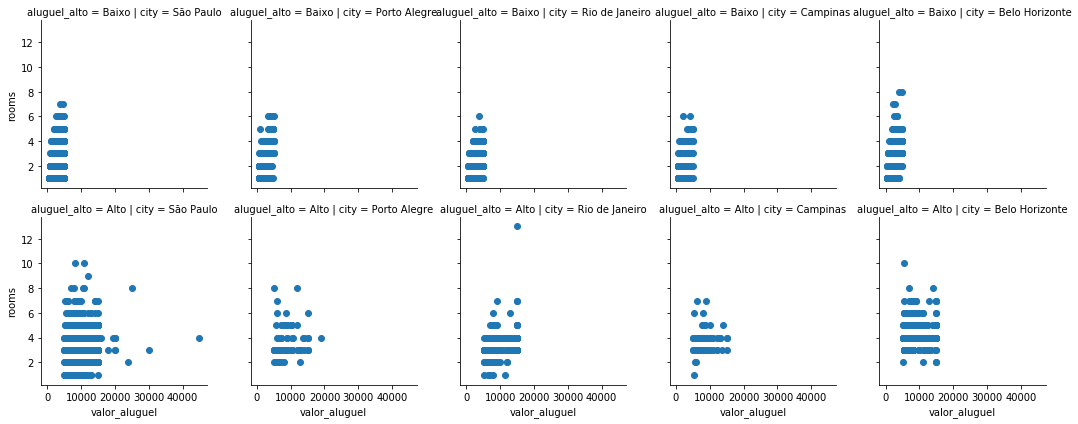

In [32]:
plot = sns.FacetGrid(data, col='city', row='aluguel_alto')
plot = plot.map(plt.scatter, 'valor_aluguel', 'rooms')